# Template for stand-alone emulator method

This notebook provides a template to build an emulator with a particular method, using stand-alone libraries. If you want to use the emulators on the emulator class, refer to [].

#### Index<a name="index"></a>
1. [Import packages](#imports)
* [Load data](#loadData)
* [Load features](#pca)
* [Set up classifier](#classification)
* [Hyperparameter optimisation](#optimisation)
 1. [`num_leaves`](#optNumLeaves)
 * [`learning_rate`](#optLearn)
 * [`n_estimators`](#optNumEst)
 * [`min_child_samples`](#optMinChild)
 * [`max_depth`](#optMaxDepth)
 * [`min_split_gain`](#optMinSplit)
 * [Grid](#optGrid)
* [Optimised classifier](#optimised)
* [Evaluate classifier](#evaluation)
 1. [Compute feature importances](#featImp)
    1. [Compare with and without redshift information](#featCompZ)
    * [Distinguish between feature origin](#featOrigin)
 * [Correlation matrix](#corr)
 * [Effect of redshift in classification](#zEffect)
* [Compare results](#comparison)

## 1. Import packages<a name="imports"></a>

In [10]:
import matplotlib.pyplot as plt
import numpy as np

## 2. Load data<a name="loadData"></a>

Read the training data from a `.npy` file:

### 2.1. Load train data<a name="loadTrainData"></a>

In [3]:
train_file = '../data/cosmology_train.npy'
train_data = np.load(train_file, allow_pickle=True)

The cosmology dataset contains cosmological parameters (Omega_m, sigma8, Omega_b) as inputs, and the correlation function as output. The correlation function is measured at 10 separation values $r$.

### 2.2. Load test data<a name="loadTestData"></a>

In [6]:
test_file = '../data/cosmology_test.npy'
test_data = np.load(test_file, allow_pickle=True)

In [7]:
ntrain = train.shape[0]
print("Number of datapoints:", ntrain)
print("Dict keys:", train[0].keys())

Number of datapoints: 1000
Dict keys: dict_keys(['x', 'y', 'label'])


In [8]:
rvals = np.linspace(50, 140, 10)
xs = np.array([d['x'] for d in train])
ys = np.array([d['y'] for d in train])
print("Number of input parameters:", xs.shape[1])
print("Number of output values:", ys.shape[1])

Number of input parameters: 3
Number of output values: 10


Text(0, 0.5, '$\\xi(r)$')

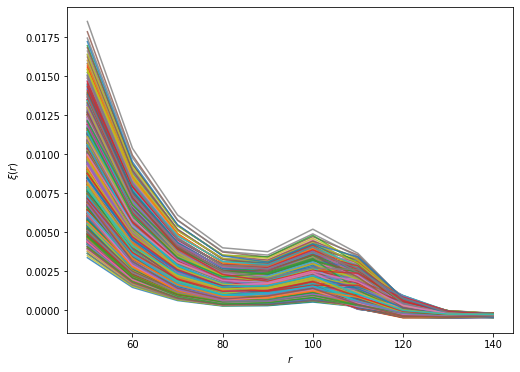

In [11]:
plt.figure(figsize=(8,6))
yplot = ys.copy()
np.random.shuffle(yplot) # shuffle so that color order isn't weird
plt.plot(rvals, yplot.T, alpha=0.8)
plt.xlabel('$r$')
plt.ylabel(r'$\xi(r)$')

In [12]:
rvals

array([ 50.,  60.,  70.,  80.,  90., 100., 110., 120., 130., 140.])

In [13]:
yplot

array([[ 4.52162479e-03,  1.96606795e-03,  8.33585893e-04, ...,
        -1.90671037e-04, -2.81157451e-04, -2.45969675e-04],
       [ 6.37103403e-03,  2.83838242e-03,  1.24774751e-03, ...,
        -1.97687248e-04, -3.63428557e-04, -3.27724790e-04],
       [ 8.38200462e-03,  4.14493417e-03,  2.10713262e-03, ...,
        -9.54859154e-05, -3.56986032e-04, -3.42362007e-04],
       ...,
       [ 1.36977325e-02,  7.39358788e-03,  4.13902469e-03, ...,
         7.88570423e-04, -1.53865775e-04, -3.59156275e-04],
       [ 7.79317741e-03,  4.09675090e-03,  2.24574241e-03, ...,
         2.41142833e-05, -2.53026574e-04, -2.65297019e-04],
       [ 7.74342072e-03,  4.13875011e-03,  2.32087472e-03, ...,
        -1.63359095e-05, -2.47753736e-04, -2.54237735e-04]])